In [79]:
import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()


In [80]:
sns.set()

In [81]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

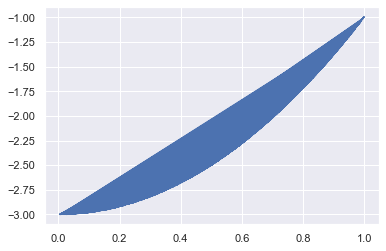

In [82]:
np.random.seed(42)
x = np.random.rand(1000,1)
y = 2*x**2 - 3 + 0.01*np.random.rand(1000, 1)
plt.plot(x,y)

### **Work with dataset**. Take our Tensor dataset

In [83]:
from torch.utils.data import Dataset, TensorDataset
from torch.utils.data.dataset import random_split
from torch.utils.data import DataLoader

In [84]:
x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()
dataset = TensorDataset(x_tensor, y_tensor)

In [85]:
# take split our data on train, val and test
size_dataset = len(dataset)
train_size = int(0.8 * size_dataset)
test_size = size_dataset - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, test_size])
print("Размеры данных:", len(train_dataset), len(val_dataset))

Размеры данных: 800 200


In [86]:
train_loader = DataLoader(dataset = train_data, batch_size = 20, shuffle=True)

### **Work with model**

In [146]:
lr = 0.1
n_epochs = 100
losses = []
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1,1)
    def forward(self, x):
        return self.linear(x)
model = LinearRegression().to(device)
loss_fn = nn.MSELoss(reduction = 'mean')
optimizer = optim.SGD(model.parameters(), lr = lr)


for epoch in range(n_epochs):
    model.train()
    for x_batch, y_batch in train_loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        
        yhat = model(x_batch)
        loss = loss_fn(y_batch, yhat)
        loss.backward()
        
        optimizer.step()
        optimizer.zero_grad()
    
    losses.append(loss)


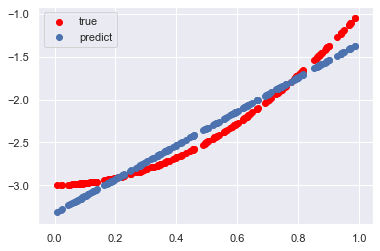

In [147]:
model.eval()
model.to('cpu')
x = val_dataset[:][0]
y = val_dataset[:][1]
yhat = model(x).detach()


plt.scatter(x, y, color = 'red', label ='true' )
plt.scatter(x, yhat, label = 'predict')
plt.legend()


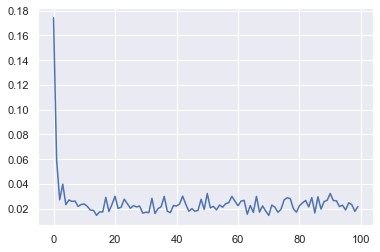

In [148]:
plt.plot(losses, label = 'Losses')